In [ ]:
# pip install pandas_datareader


In [ ]:
# pip install yfinance


In [3]:
from pandas_datareader import data as web
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
yf.pdr_override()

import twstock

df = web.get_data_yahoo()

TypeError: download() missing 1 required positional argument: 'tickers'

In [ ]:
from pandas_datareader import data as web
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
yf.pdr_override()

start = dt.datetime(2019, 1, 1)
end = dt.datetime(2019, 12, 31)


df = web.get_data_yahoo(['2330.TW'],start, end)
df.to_csv(r'1.csv')



import pandas as pd
import numpy as np



d = pd.DataFrame(df)
print(d)




close_df = df["Close"]
open_df = df["Open"]




# close_df.describe()




# open_df.describe()




fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
close_df.plot(ax=ax[0])
ax[0].set_title("Close")
open_df.plot(ax=ax[1])
ax[1].set_title("Open")



             Open   High    Low  Close   Adj Close    Volume  X1  X2  X3  X4
Date                                                                        
2019-01-02  226.5  226.5  219.0  219.5  202.703079  32900482   0   0   0   0
2019-01-03  214.0  218.0  214.0  215.5  199.009171  34087620   0   0   0   0
2019-01-04  211.5  211.5  206.5  208.0  192.083099  65943521   0   0   0   0
2019-01-07  212.0  214.0  211.0  213.0  196.700485  35442176   0   0   0   0
2019-01-08  212.0  212.5  210.0  211.0  194.853546  22694481   0   0   0   0
...           ...    ...    ...    ...         ...       ...  ..  ..  ..  ..
2019-12-24  334.0  334.5  332.0  332.0  321.516846  13488907   0   0   0   0
2019-12-25  332.0  334.5  331.0  333.0  322.485291  12262954   0   0   0   0
2019-12-26  333.0  334.0  331.5  333.0  322.485291  11427884   0   0   0   0
2019-12-27  335.0  338.0  335.0  338.0  327.327393  16677806   0   0   0   0
2019-12-30  338.0  339.0  334.0  334.5  323.937927  21531263   0   0   0   0

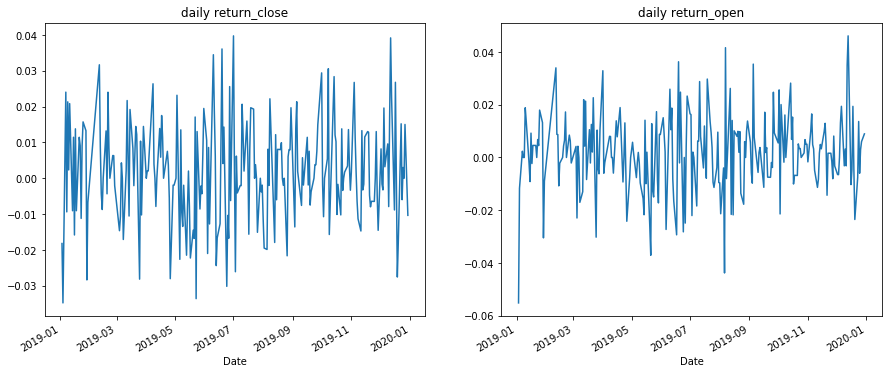

In [2]:


daily_return1 = (close_df.diff()/close_df.shift(periods = 1)).dropna()
daily_return1.head()




daily_return2 = (open_df.diff()/open_df.shift(periods = 1)).dropna()
daily_return2.head()

# daily_return1 = (close_df.diff()/close_df.shift(periods = 1)).dropna()
# daily_return2 = (open_df.diff()/open_df.shift(periods = 1)).dropna()
# daily_return1.head()
# daily_return2.head()



fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
daily_return1.plot(ax=ax[0])
ax[0].set_title("daily return_close")
daily_return2.plot(ax=ax[1])
ax[1].set_title("daily return_open")




d['X1']= 0
d['X2']= 0
d['X3']= 0 
d['X4']=0



print(d)




Q1 = ["2019-01", "2019-02", "2019-03"]
Q2 = ["2019-04", "2019-05", "2019-06"]
Q3 = ["2019-07", "2019-08", "2019-09"]
Q4 = ["2019-10","2019-11","2019-12"]
for i in Q1:
    d.loc[i,"X1"] = 1
for i in Q2:
    d.loc[i,"X2"] = 1
for i in Q3:
    d.loc[i,"X3"] = 1
    
for i in Q4:
    d.loc[i,"X4"] = 1


print(d)



lrModel = LinearRegression()
y = d['Close'].values.reshape(-1, 1) 
x = d.iloc[:,6:]



est = sm.OLS(y, x)
est = est.fit()
print (est.summary())



x = sm.add_constant(x.to_numpy())



est = sm.OLS(y, x)
est = est.fit()
print (est.summary())


In [3]:
ar = np.mean(daily_return1)*252

print (ar)

0.4687744614227841


In [4]:
# 波動率
volatility = np.std(daily_return1)*np.sqrt(252)
# std: standard deviation

print(volatility)

0.2201180785150325


In [5]:
sharp_r= ar/volatility

print(sharp_r)

2.1296499796166


TME
VIAC
NIO
AAPL
DISCA
PLTR
RKT
GE
BAC
F
AMC
T
AMD
X
WFC
ITUB
AAL
TSLA
PFE
BBD
INTC


C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


PBR
NOK


C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


PLUG
CSCO


C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

GGB
DKNG
BA
FB

C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op


FCEL
CCIV


C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


XOM
MRO


C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


CMCSA
CLF


C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


CCL
CAN
MSFT


C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

VZ
VALE


C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


MU
FCX


C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


BABA
SNAP
RIOT
JPM


C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

GOLD
KO
SKLZ
NLY


C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

SIRI
GM


C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


ABEV
M
C


C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

ORCL
MARA
SWN
ET


C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

XPEV
OXY
KEY
TLRY


C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

PCG
UAL
NCLH
HBAN
RIG


C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

SLB
KGC


C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

BP
LI


C:\Users\agron\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


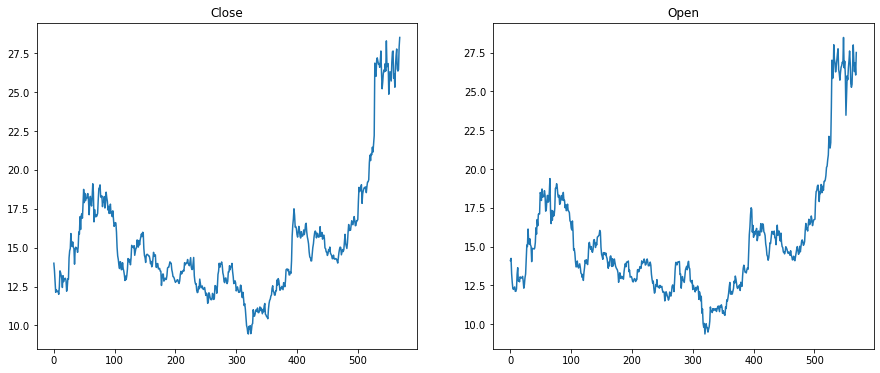

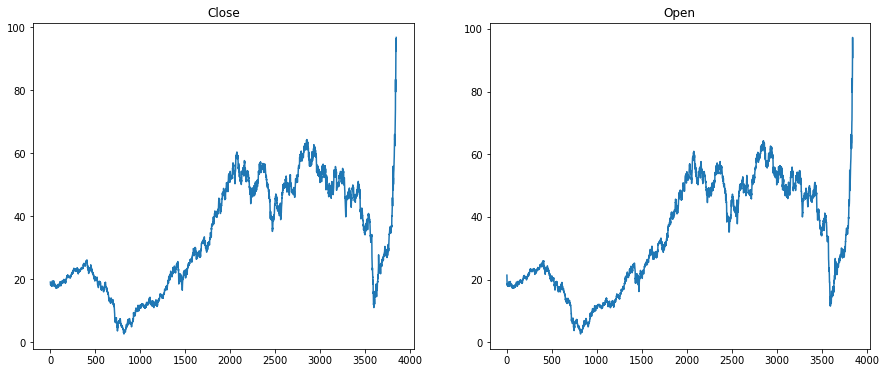

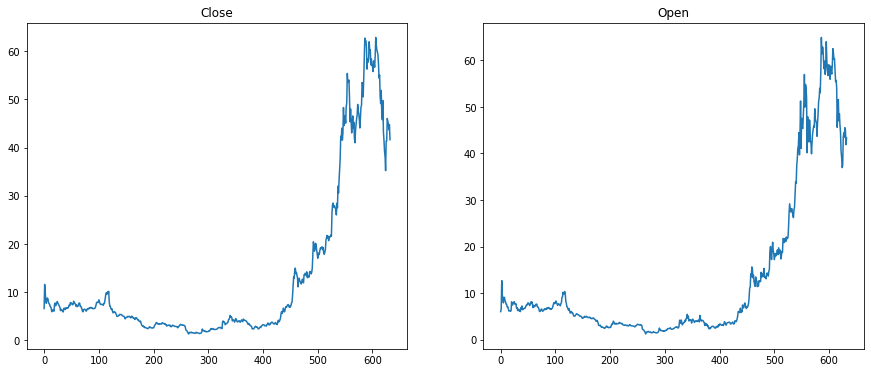

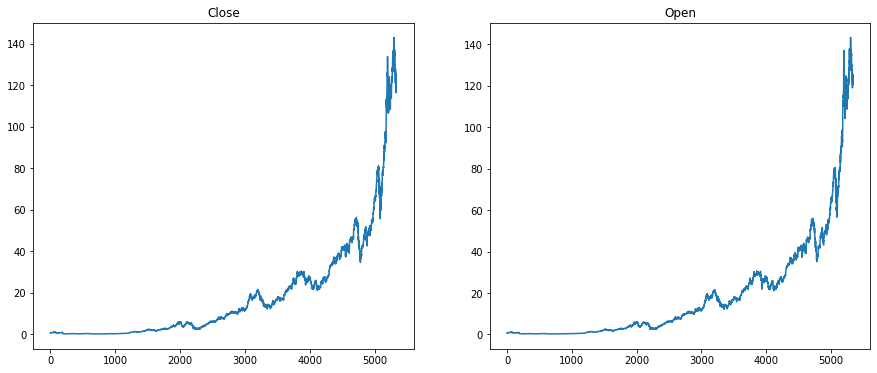

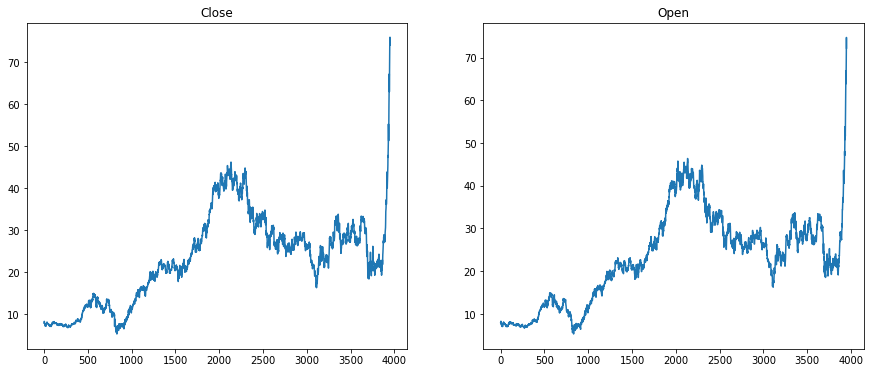

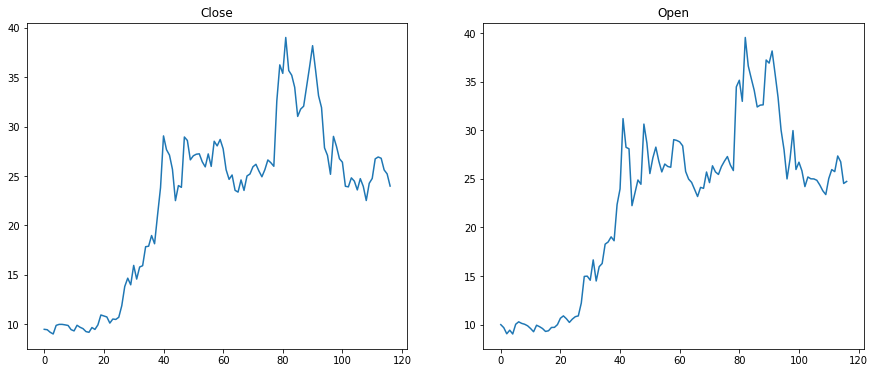

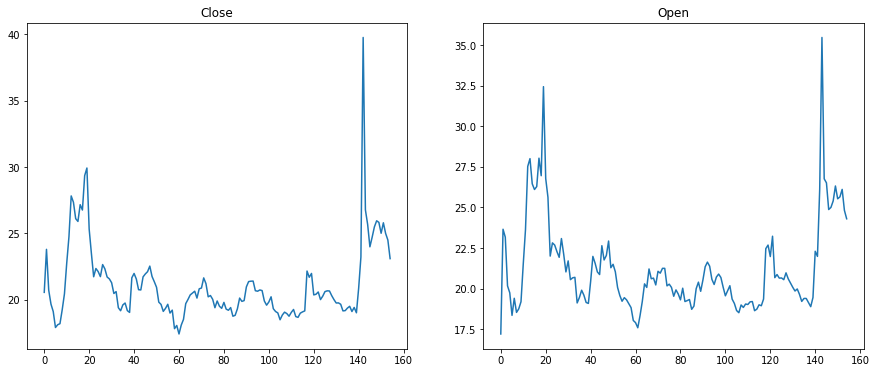

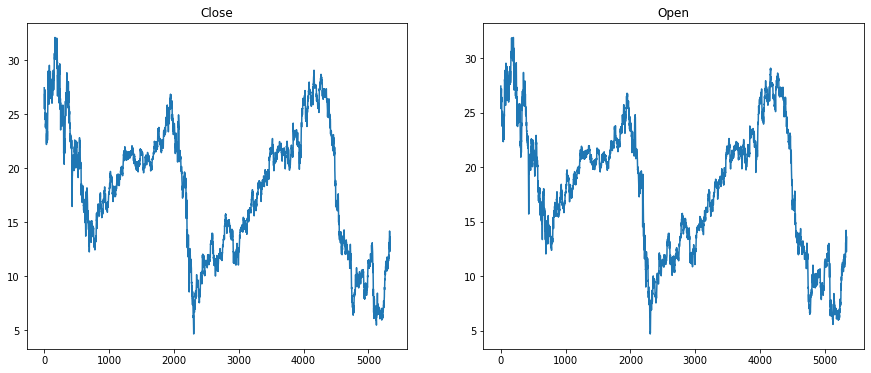

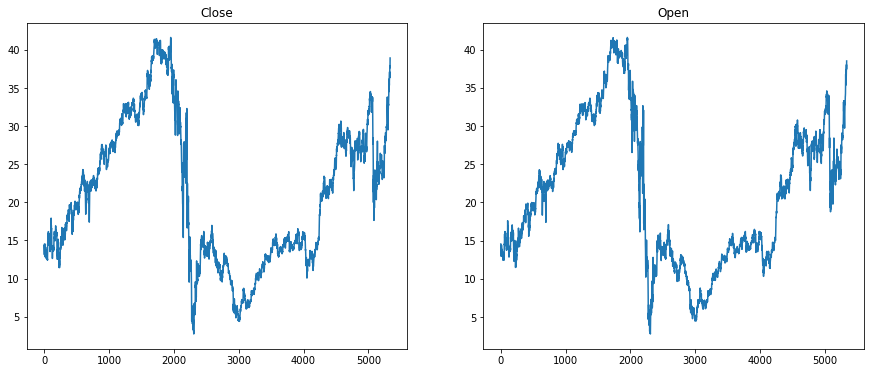

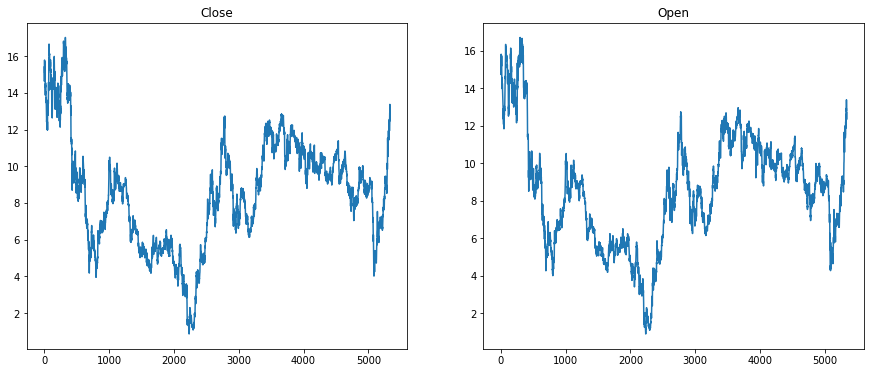

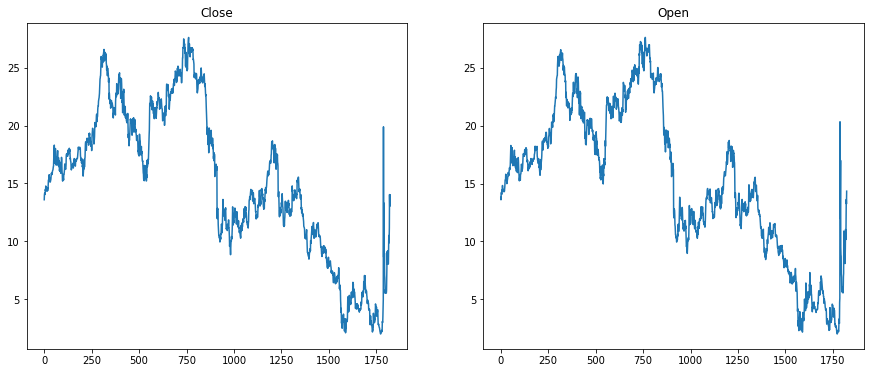

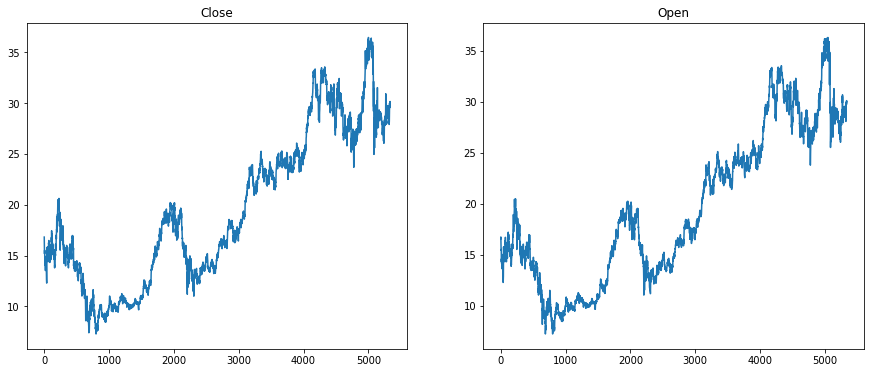

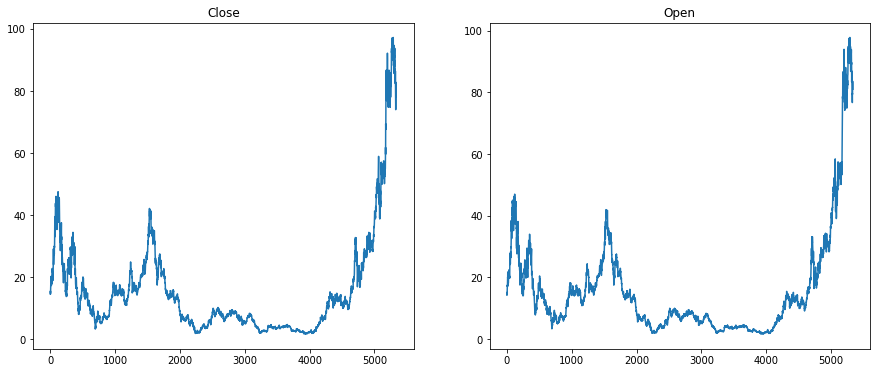

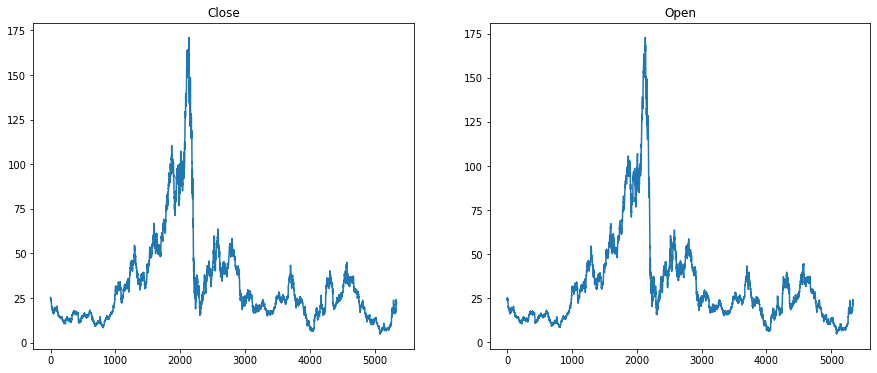

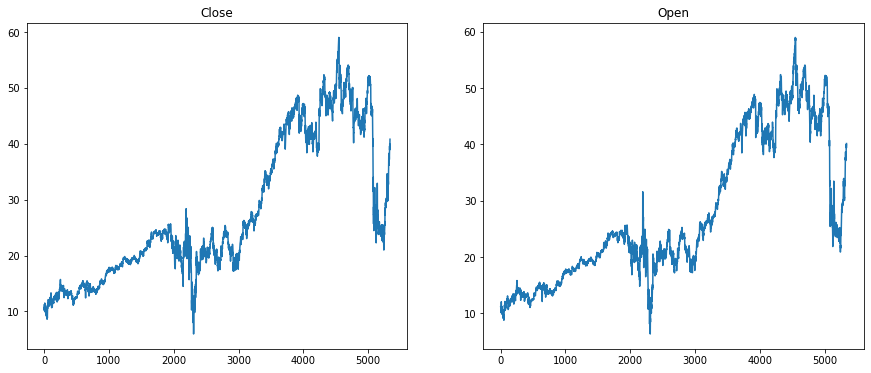

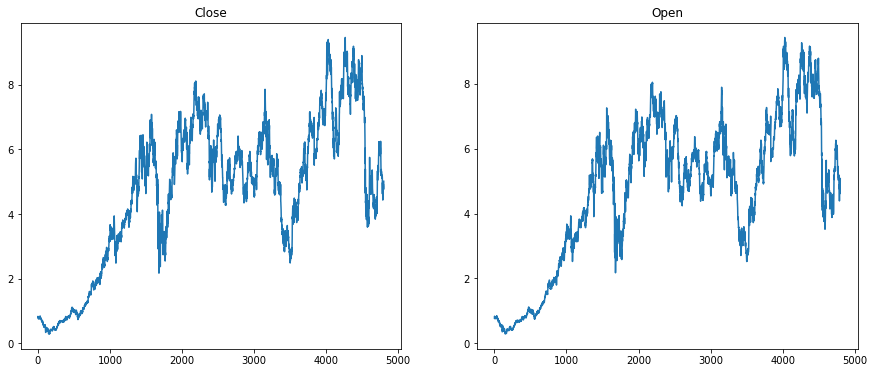

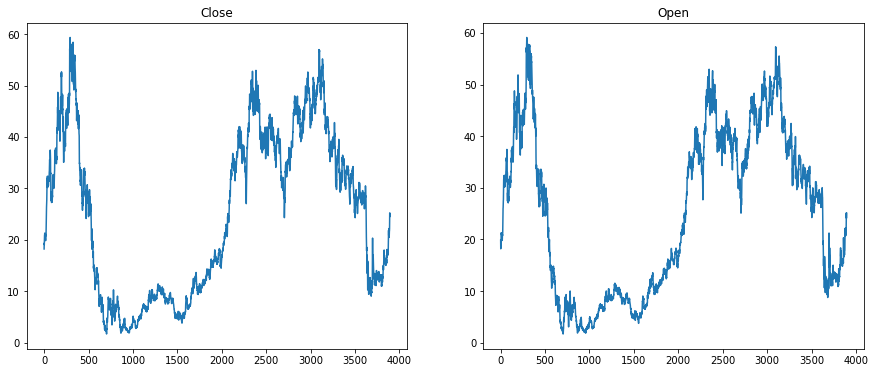

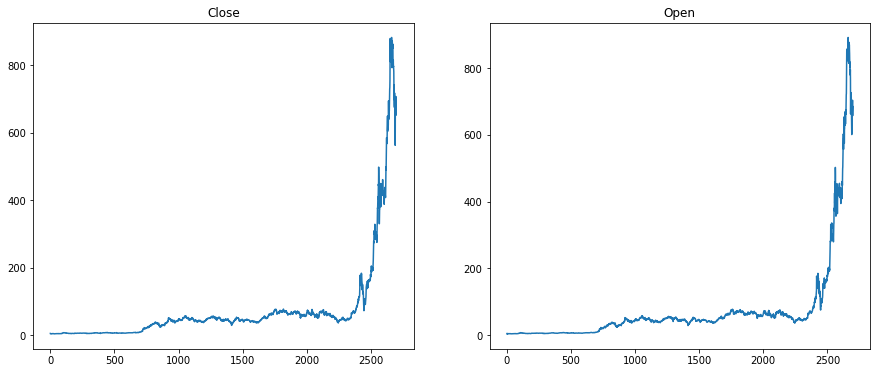

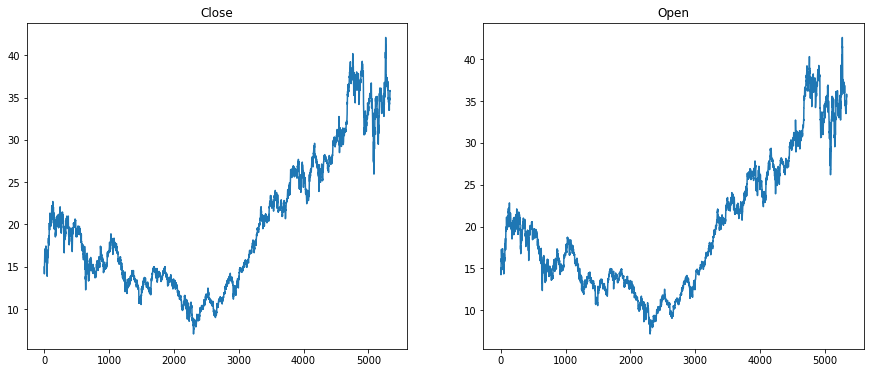

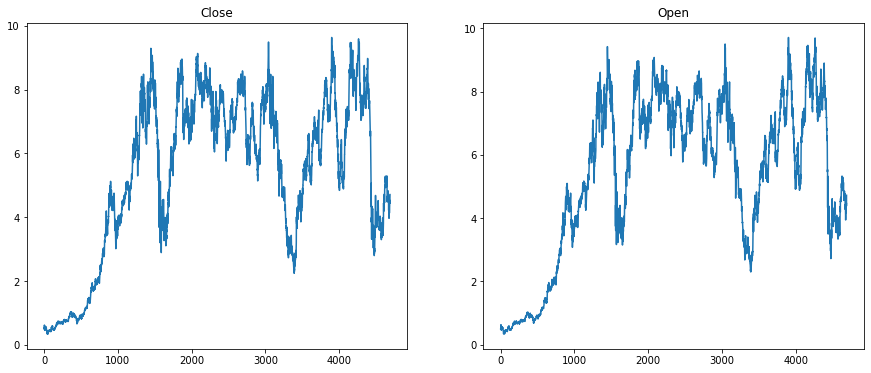

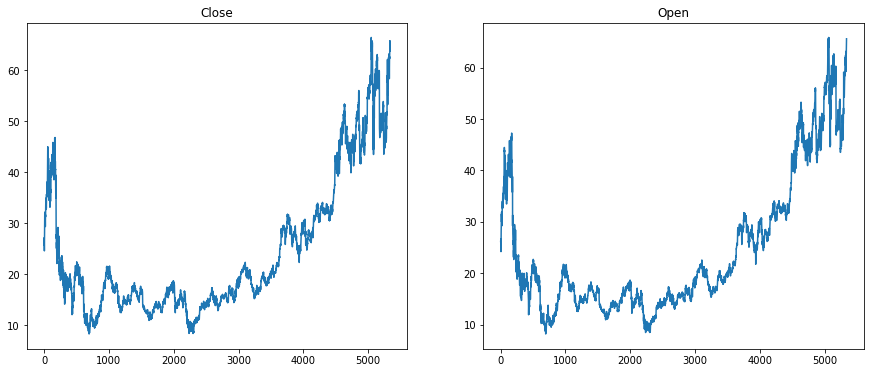

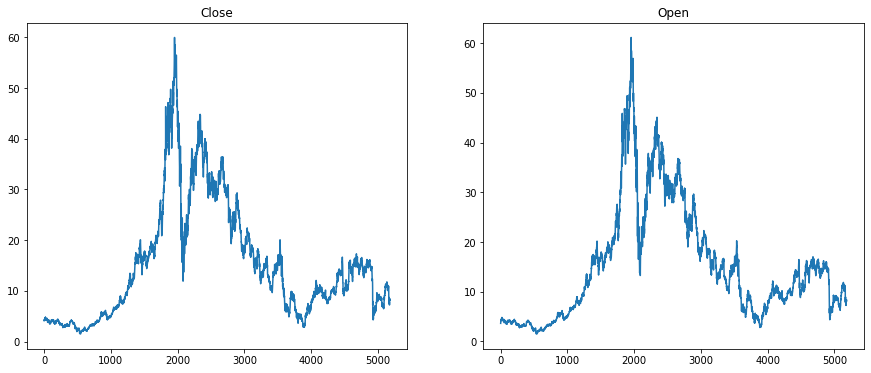

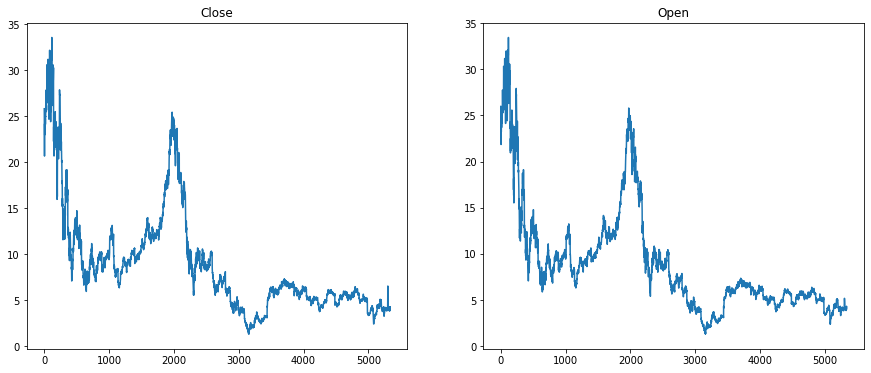

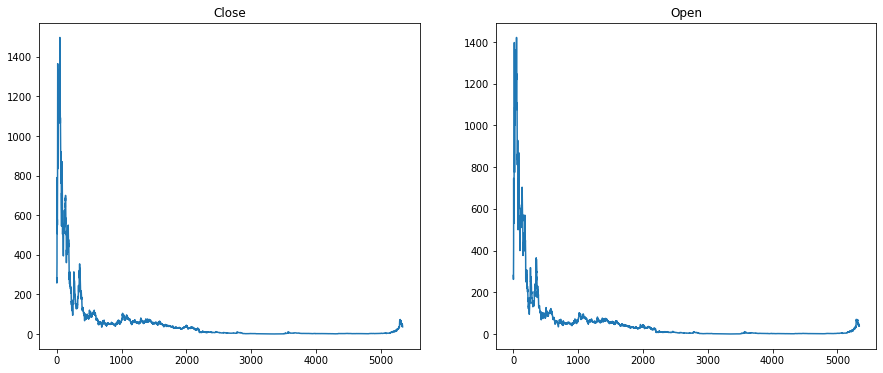

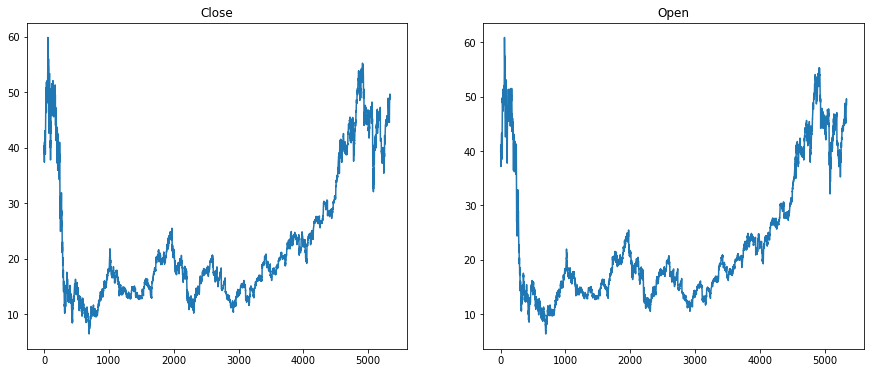

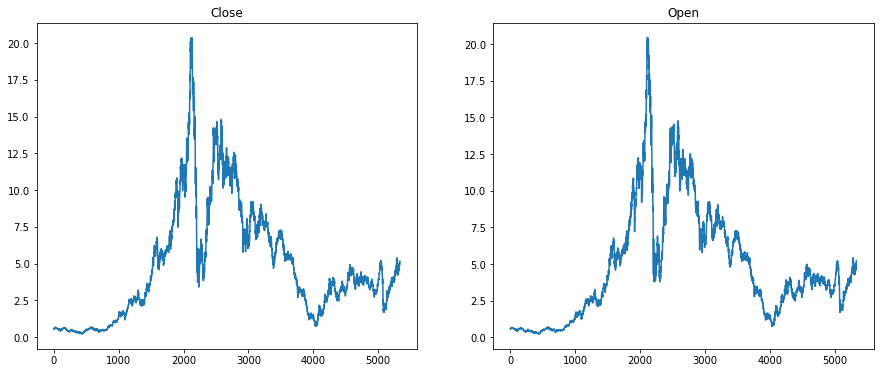

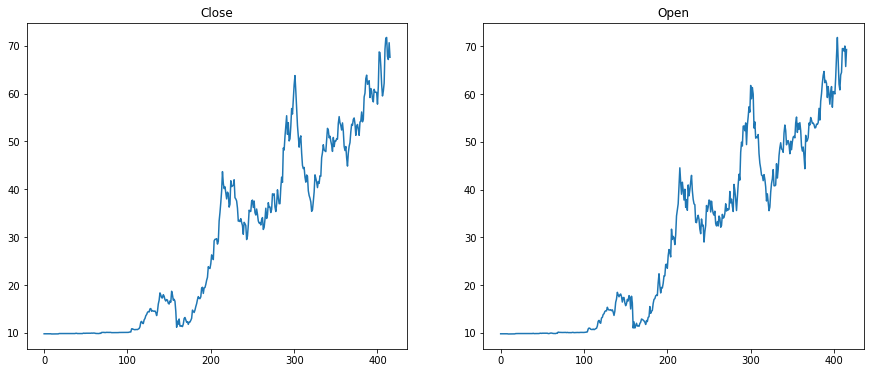

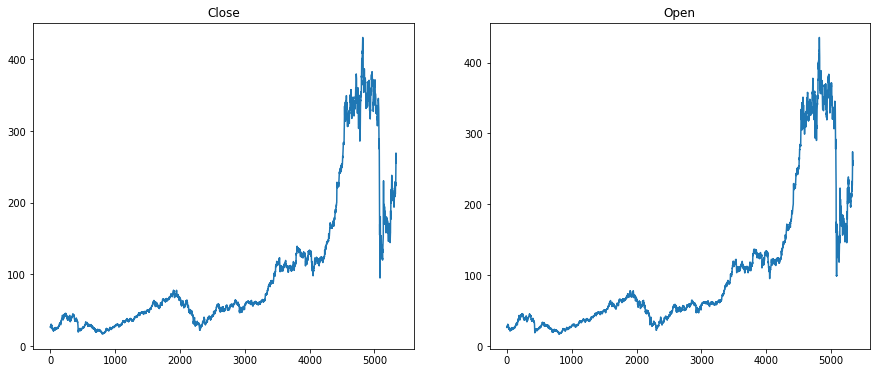

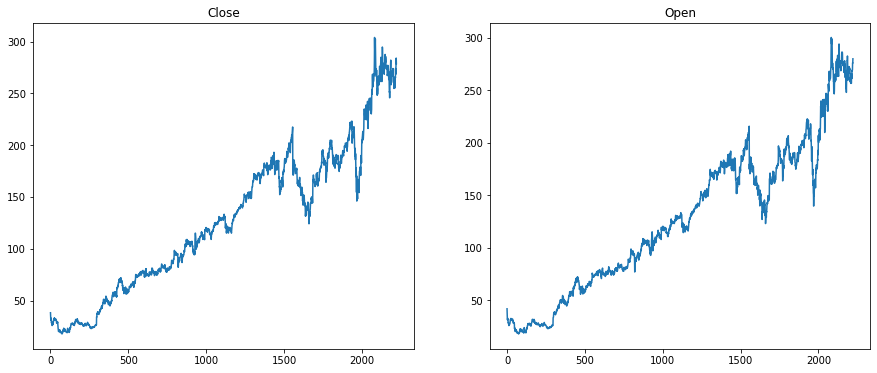

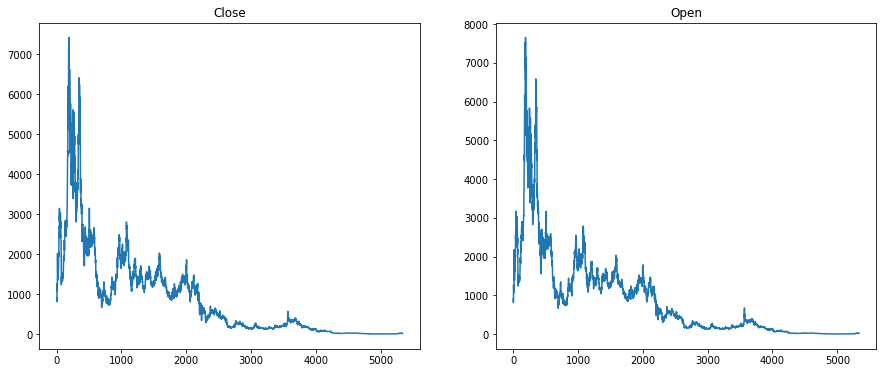

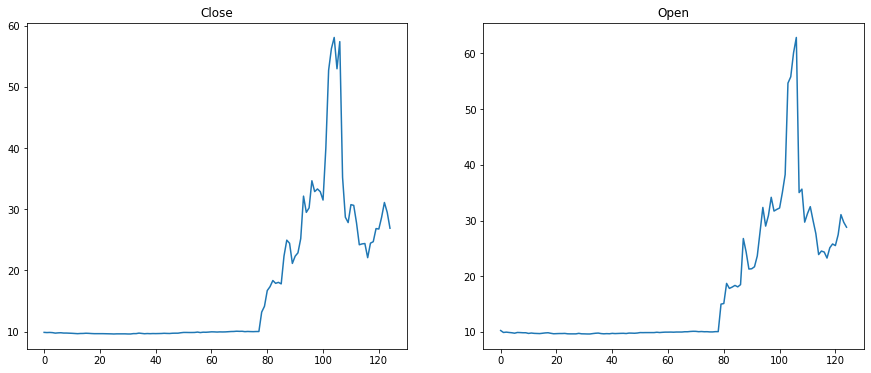

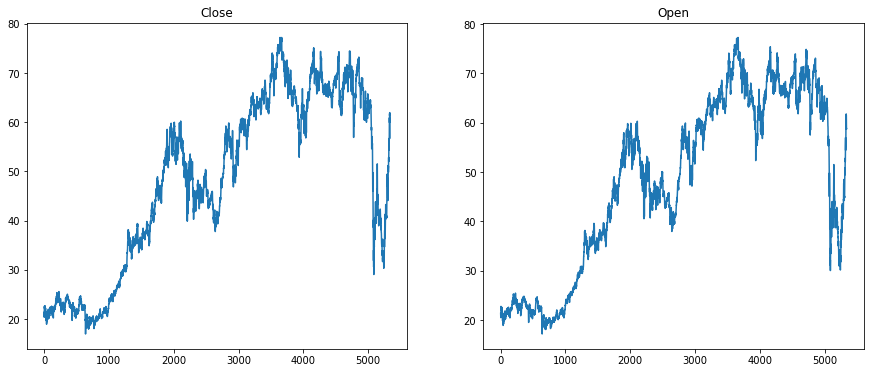

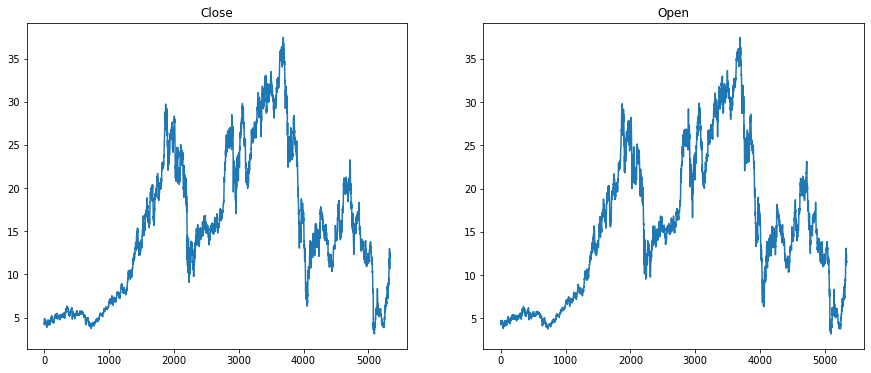

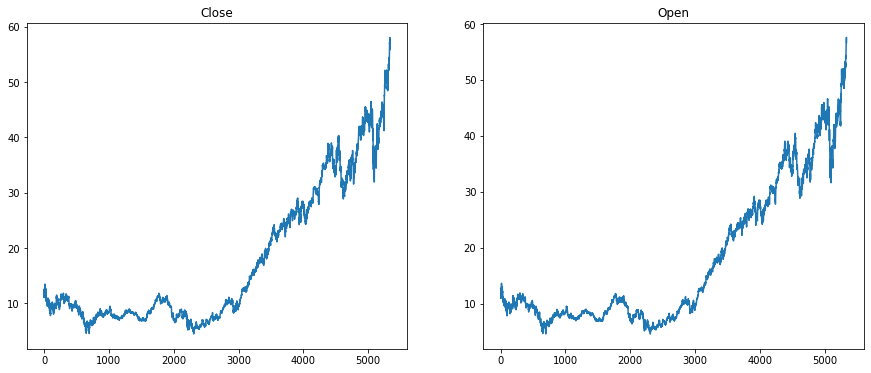

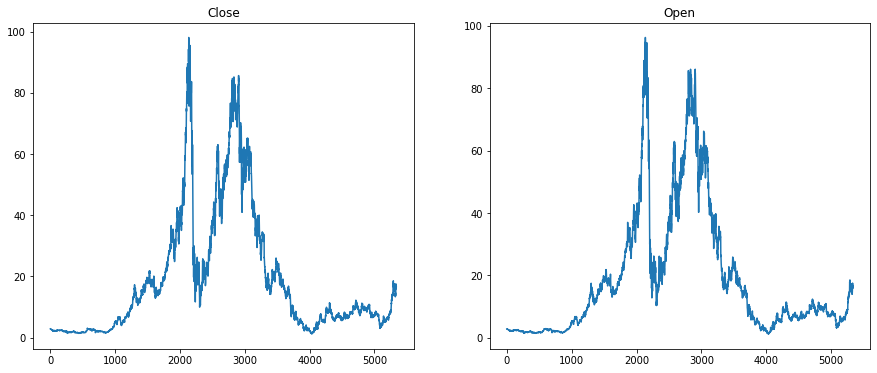

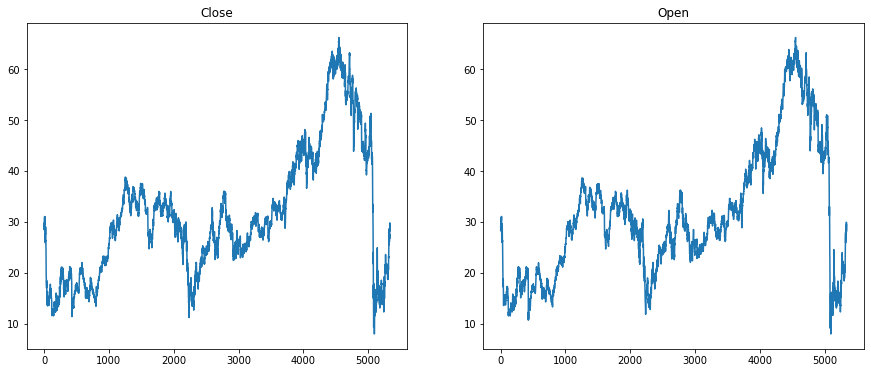

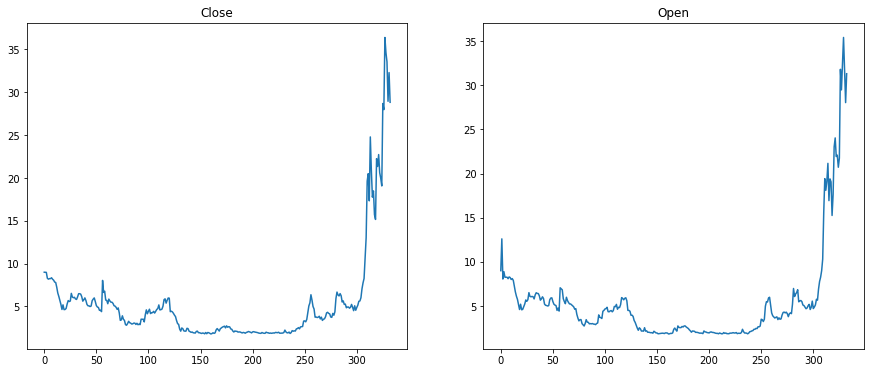

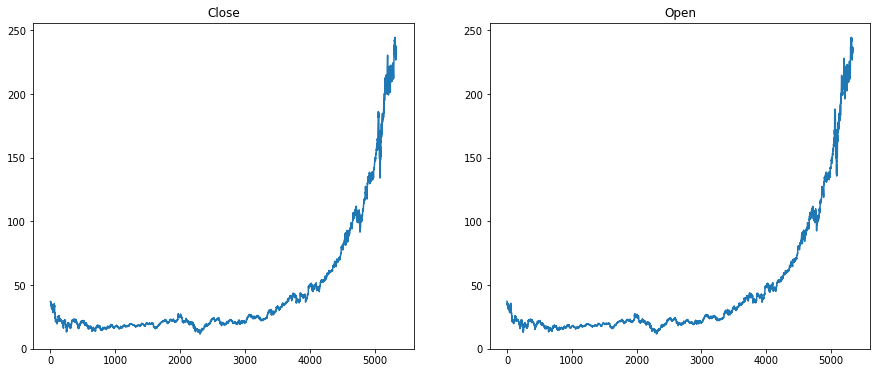

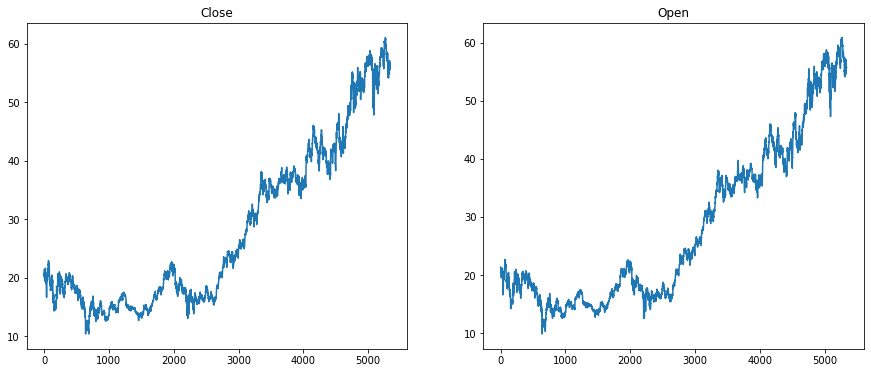

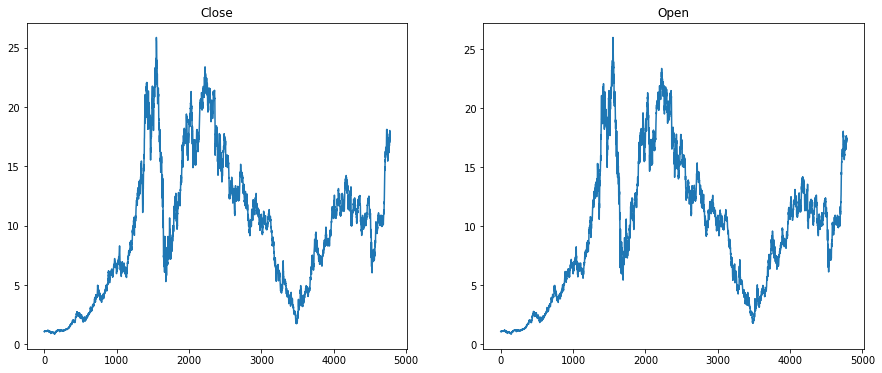

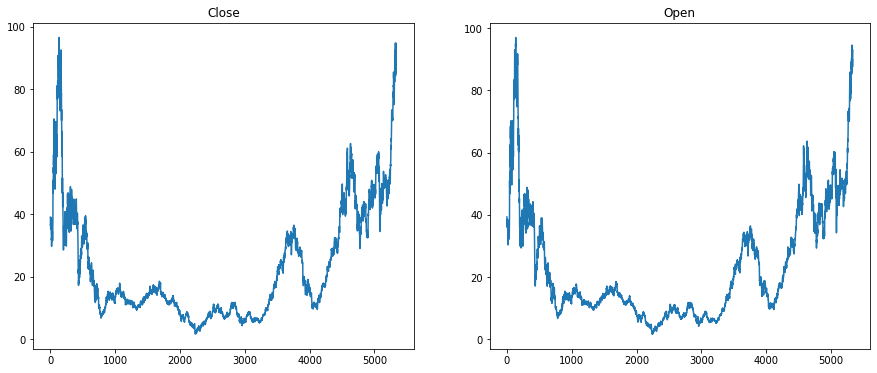

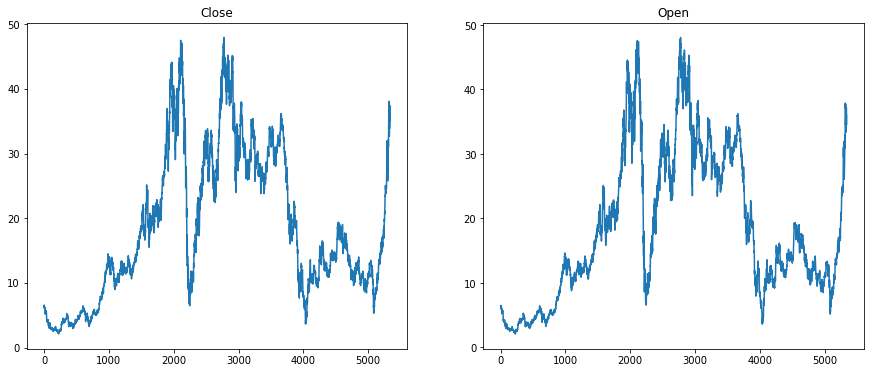

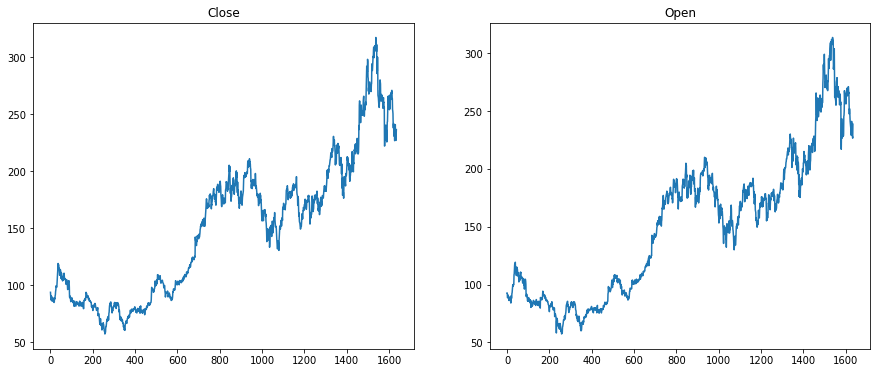

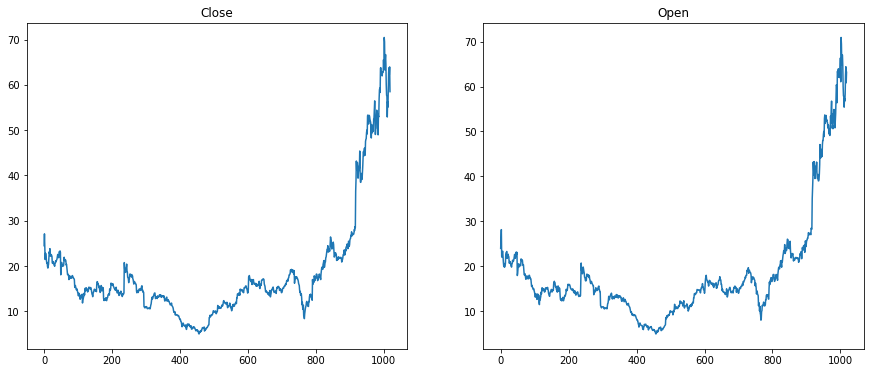

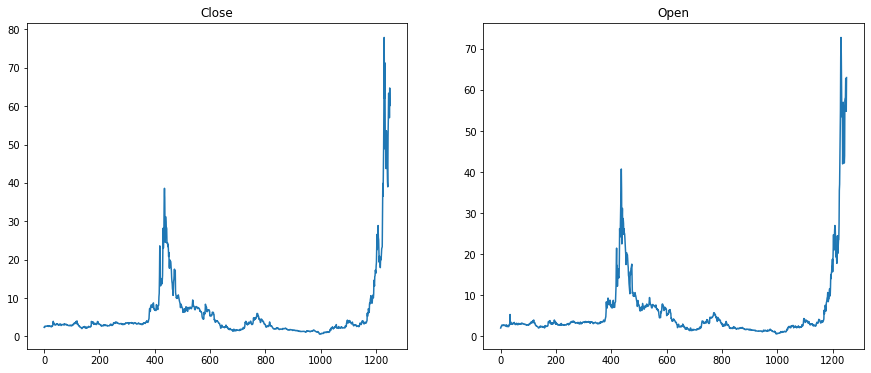

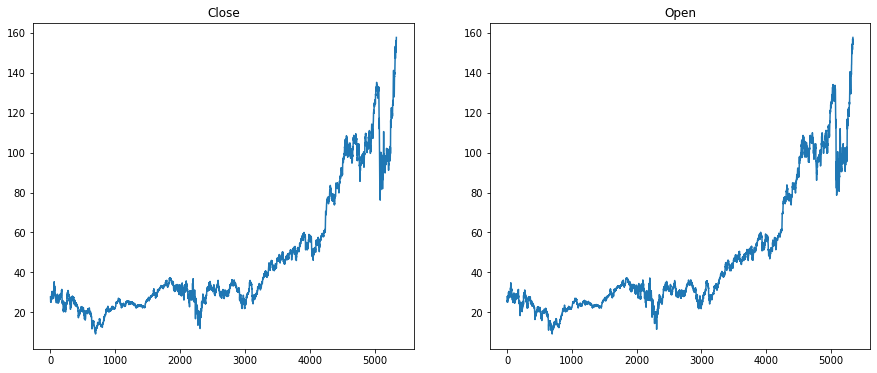

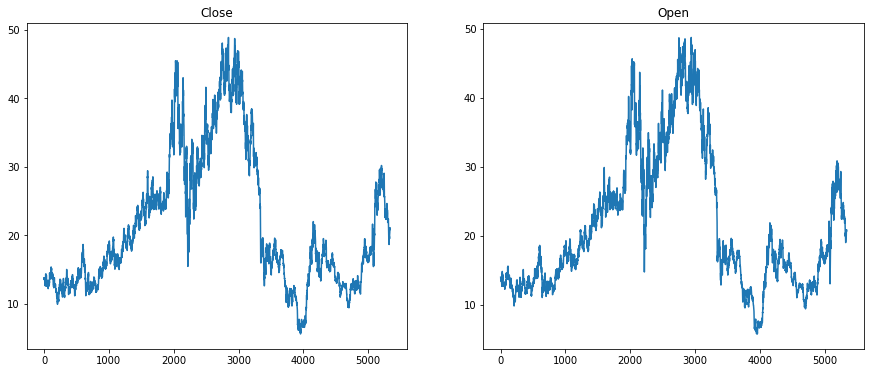

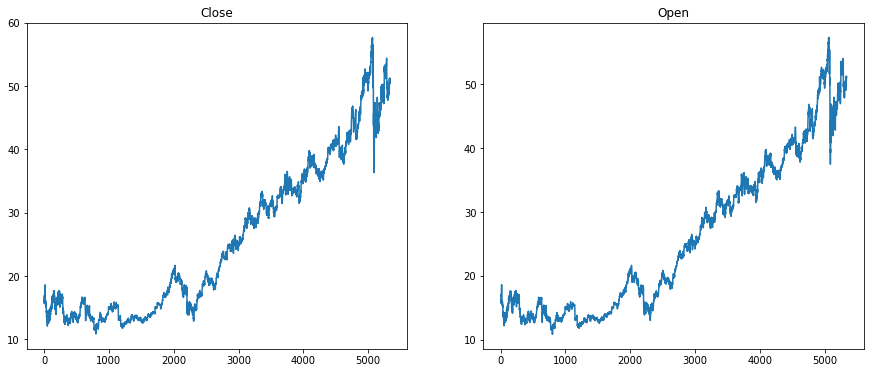

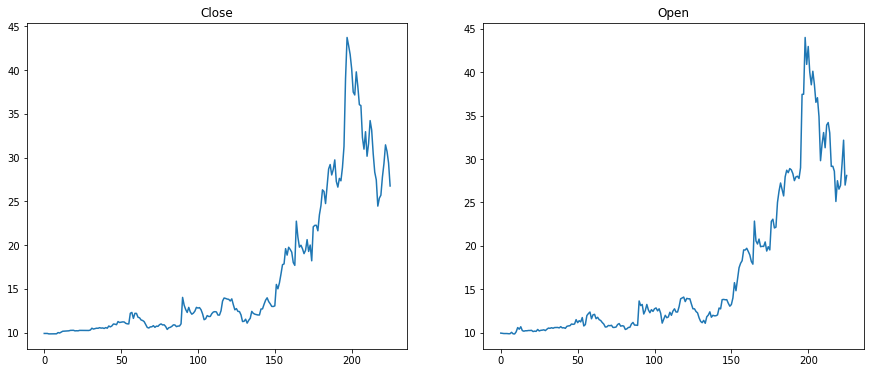

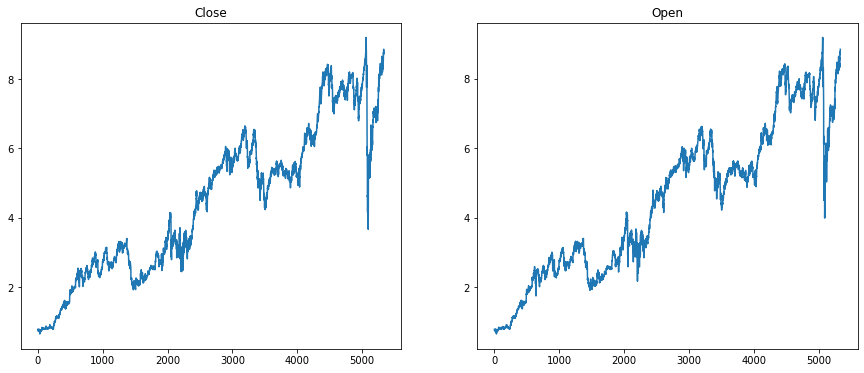

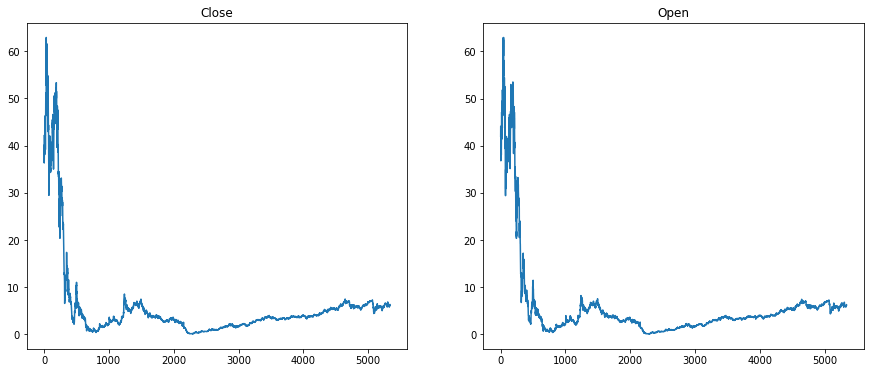

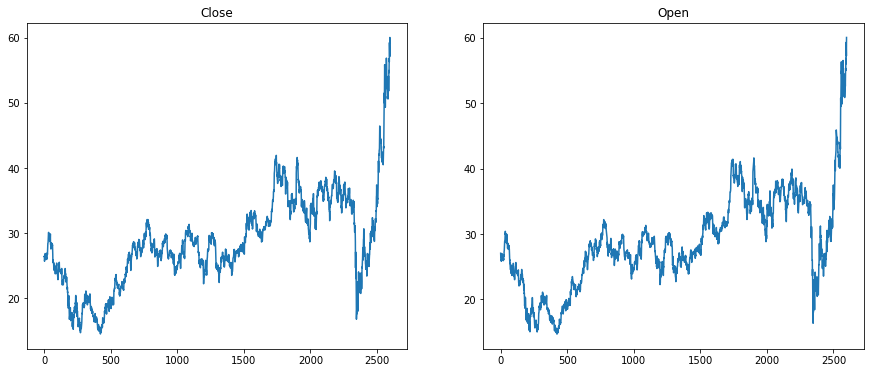

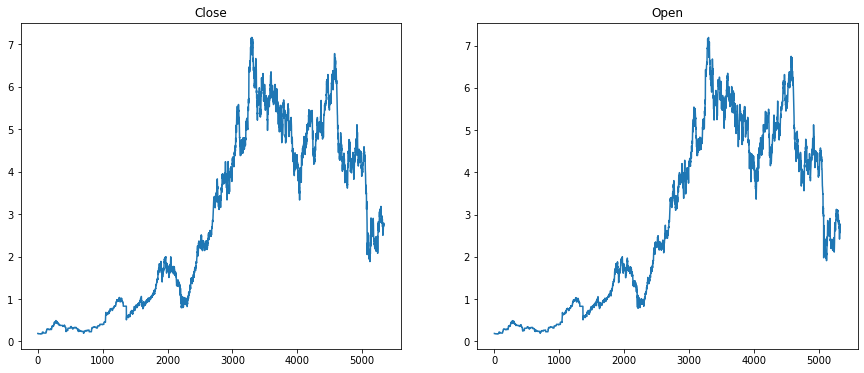

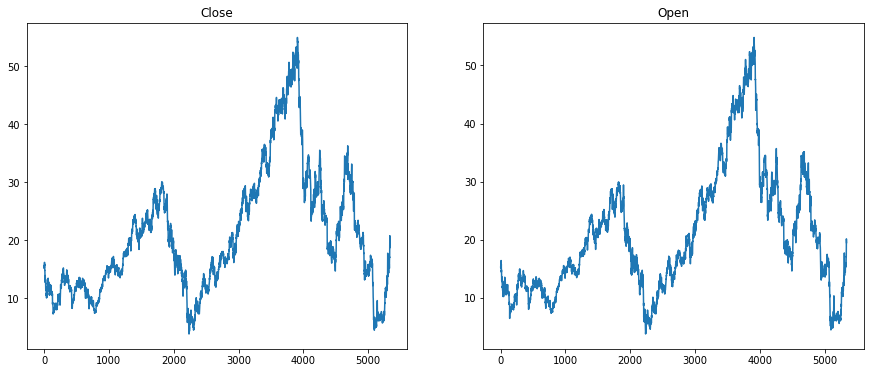

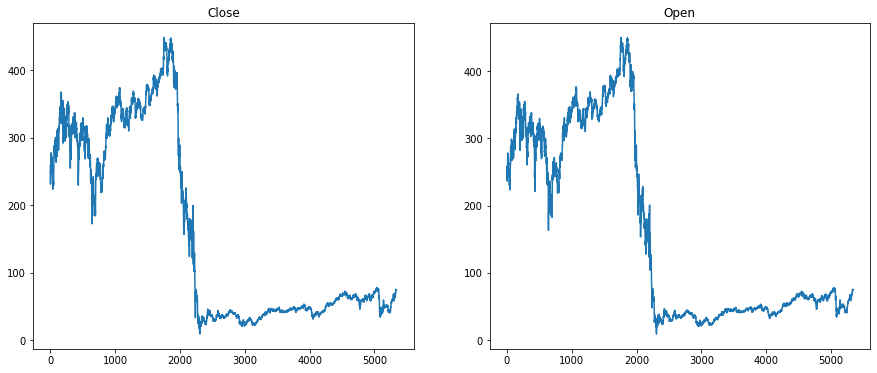

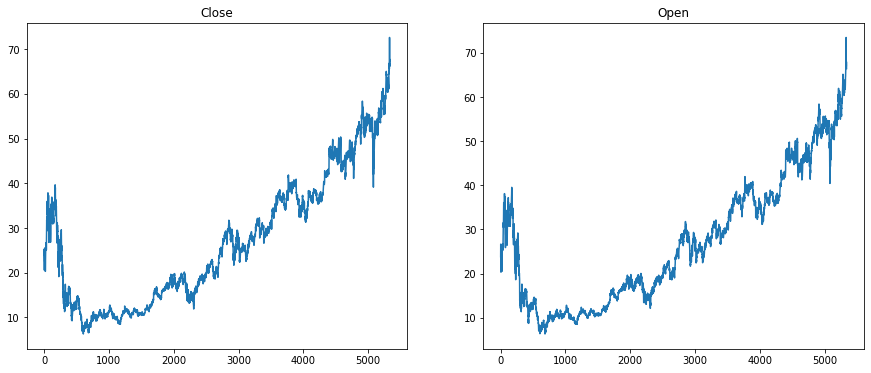

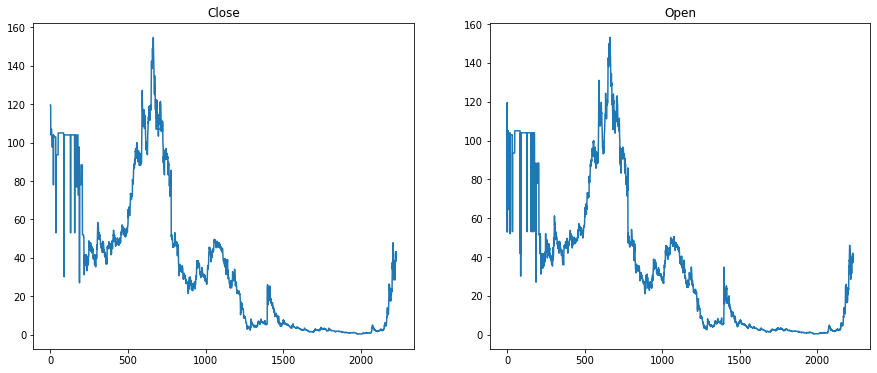

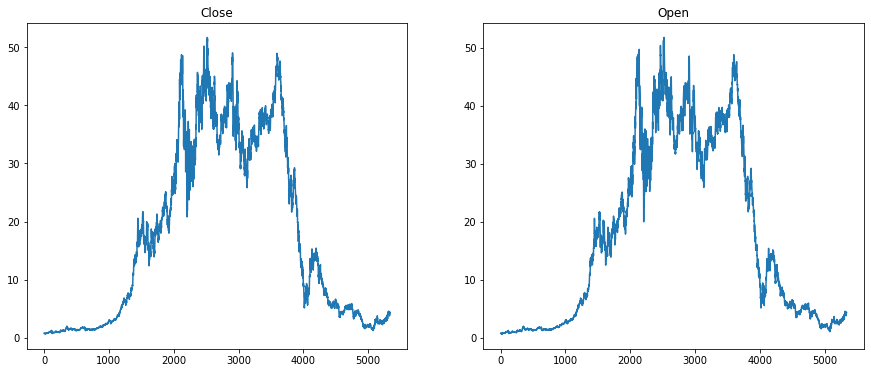

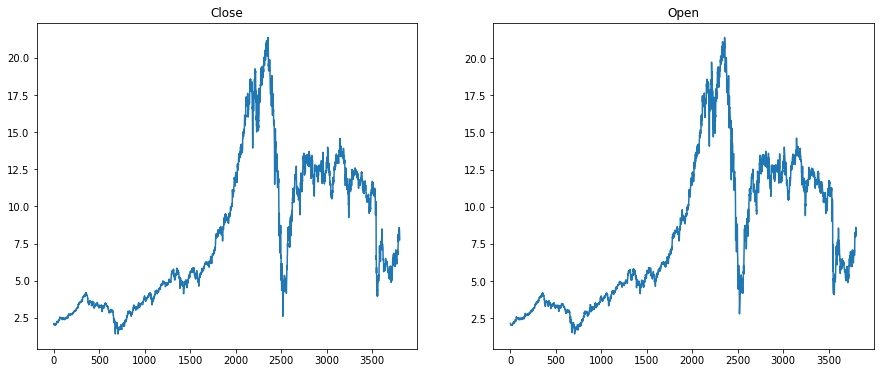

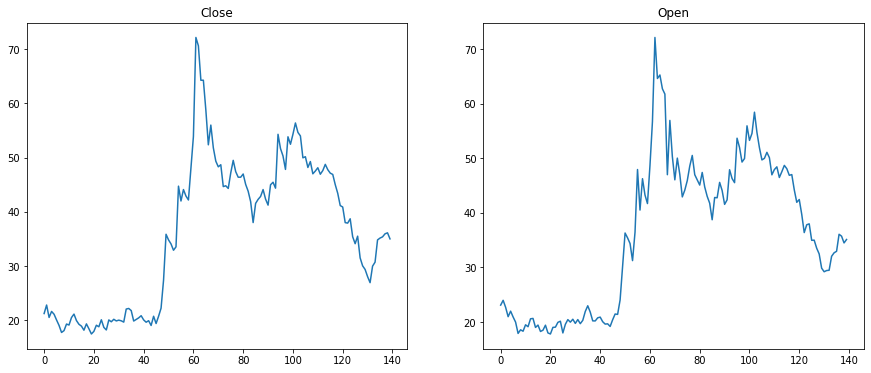

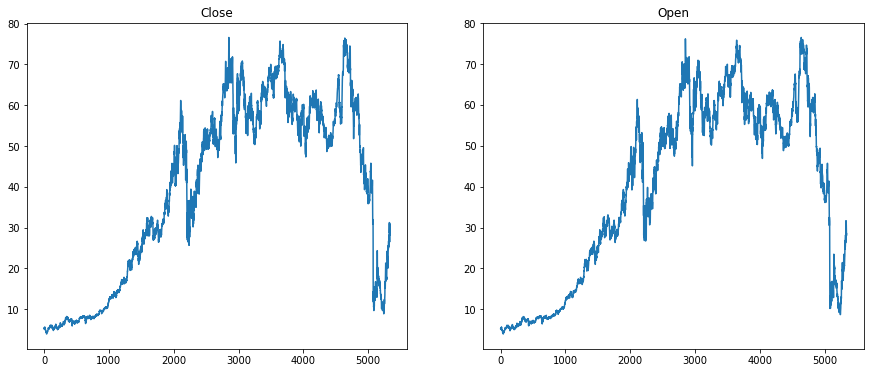

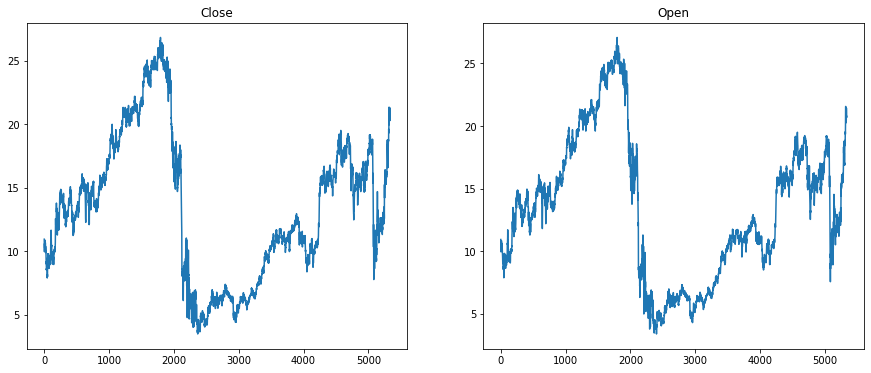

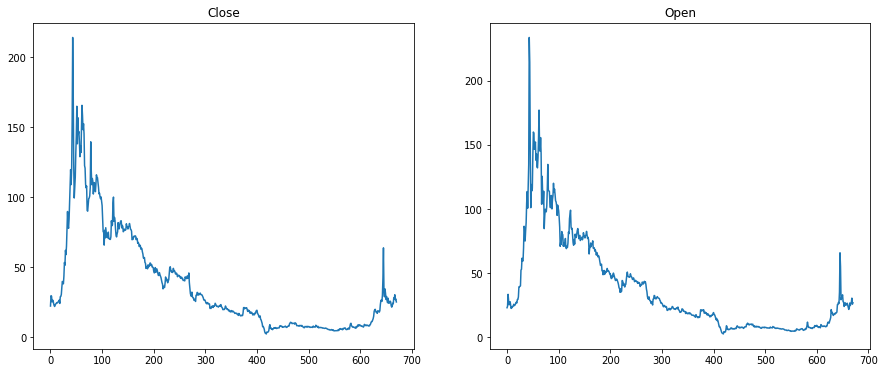

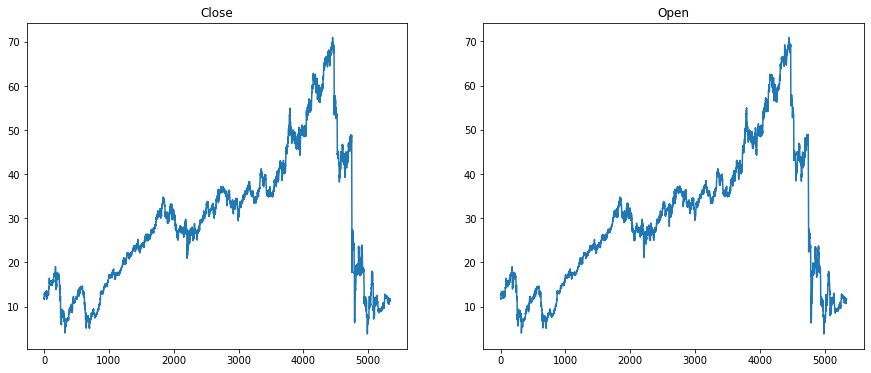

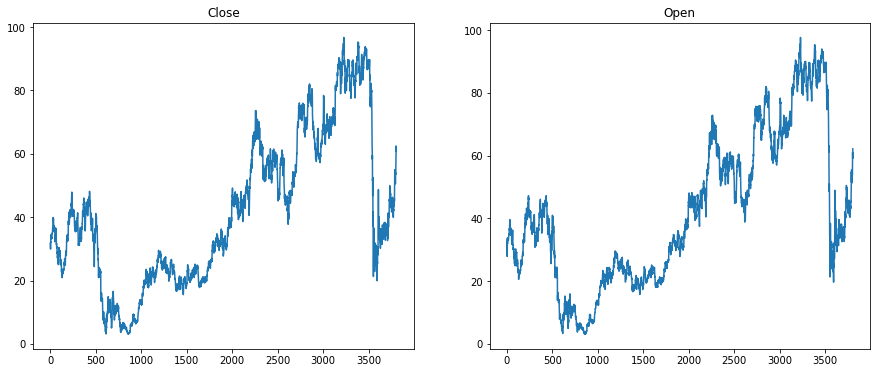

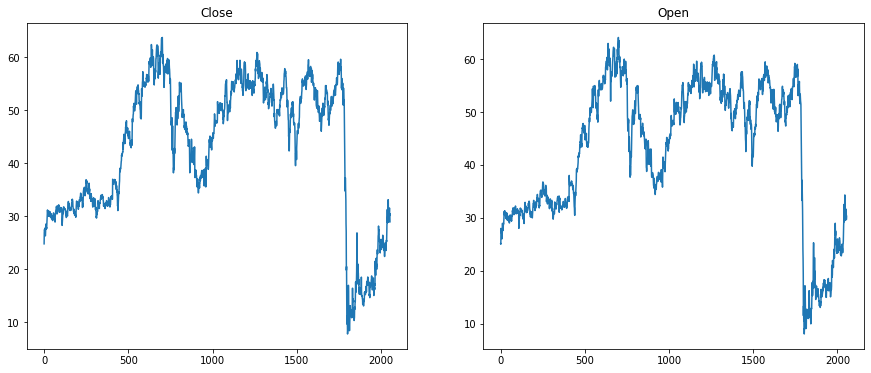

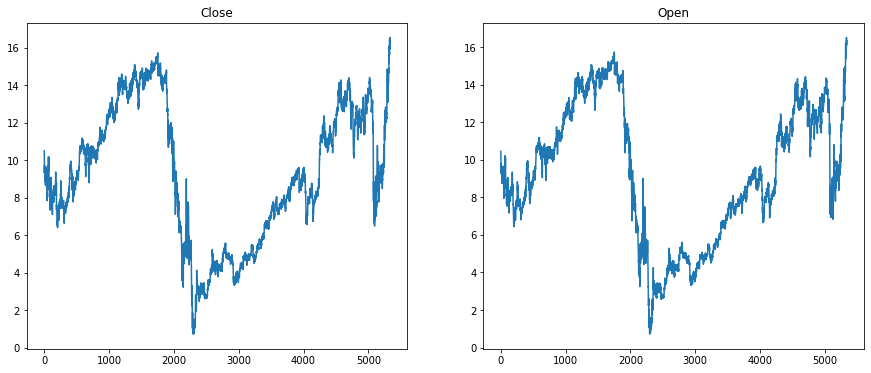

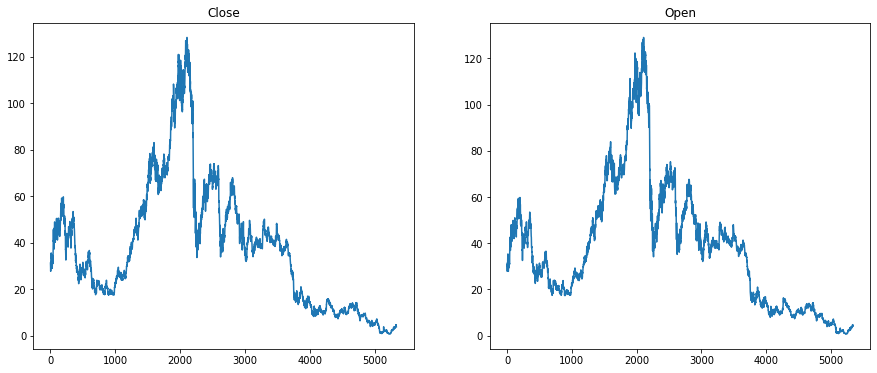

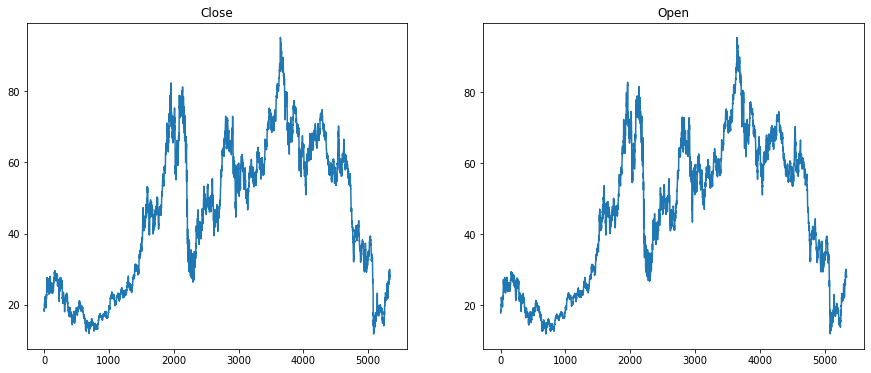

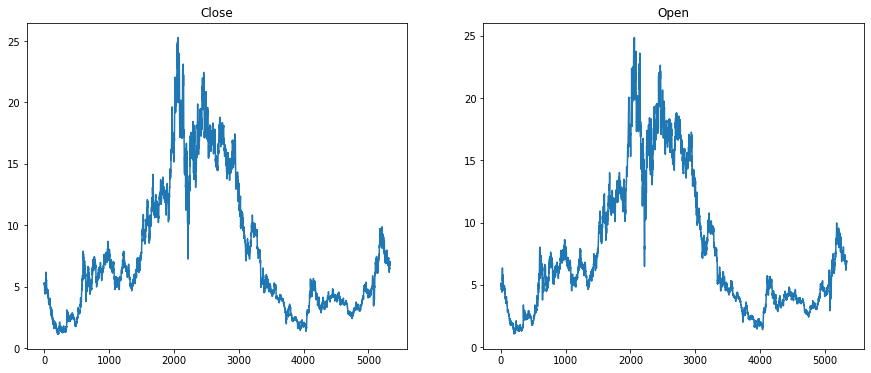

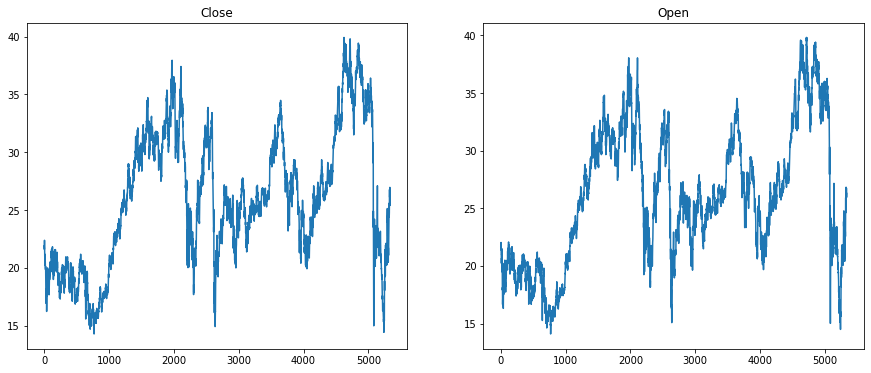

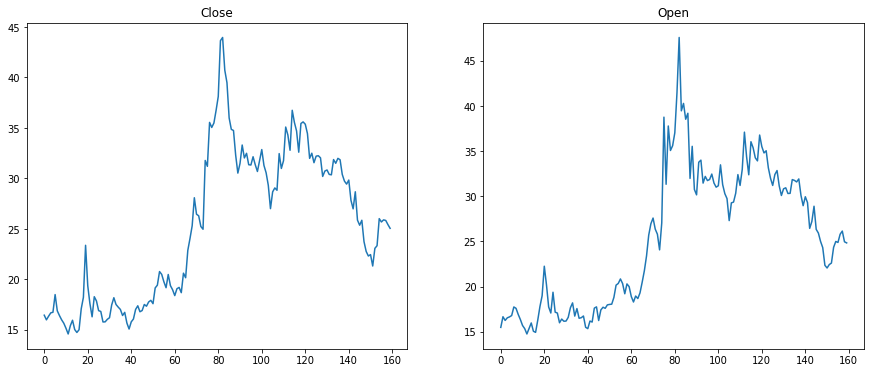

In [6]:

# import pandas as pd
# import yfinance as yf
# import time
# import matplotlib.pyplot as plt

# v= pd.read_csv('../Try/price_AAPL.csv')

# close_df = v["Close"]
# open_df = v["Open"]

# fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
# close_df.plot(ax=ax[0])
# ax[0].set_title("Close")
# open_df.plot(ax=ax[1])
# ax[1].set_title("Open")



import pandas as pd
import yfinance as yf
import time

url = 'https://finance.yahoo.com/screener/predefined/most_actives?count=100&offset=0'
data = pd.read_html(url)[0]
failed_list=[]
stk_list = data.Symbol
for i in stk_list:
    try:
        
        v= pd.read_csv('../Try/price_'+i+'.csv')
        print(i)
        close_df = v["Close"]
        open_df = v["Open"]

        fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
        close_df.plot(ax=ax[0])
        ax[0].set_title("Close")
        open_df.plot(ax=ax[1])
        ax[1].set_title("Open")

    except:
        failed_list.append(i)
        continue


In [132]:
from pandas_datareader import data as web
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols

import pandas as pd
import numpy as np
yf.pdr_override()


start = dt.datetime(2000, 1, 1)
end = dt.datetime(2021, 1,1)

df = web.get_data_yahoo(['^TWII'],start, end)
df1 = web.get_data_yahoo(['SPY'],start, end)

# df.to_csv('0050.csv')
# df1.to_csv('SPY.csv')
# close_df=df['Close']
# close_df1=df1['Close']
df2 = pd.concat([df['Adj Close'],df1['Adj Close']],axis=1)

df2.corr('pearson')
# df1.corr()

# plt.scatter(close_df,close_df1)
# df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Adj Close,Adj Close
Adj Close,1.000000,0.885107
Adj Close,0.885107,1.000000


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
           Adj Close  Adj Close
Adj Close   1.000000   0.141173
Adj Close   0.141173   1.000000


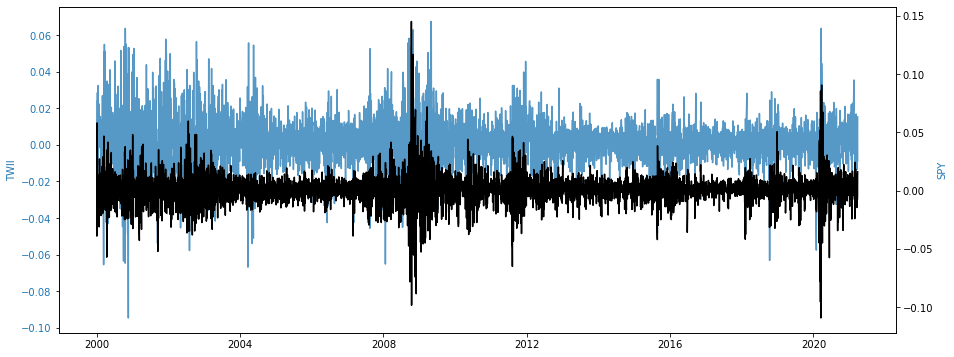

In [156]:
# TWII & SPY 之報酬率相關係數

from pandas_datareader import data as web
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
yf.pdr_override()


start = dt.datetime(2000, 1, 1)
end = dt.datetime(2021, 3,29)

df = web.get_data_yahoo(['^TWII'],start, end)
df1 = web.get_data_yahoo(['SPY'],start, end)
# df2 = pd.concat([df['Adj Close'],df1['Adj Close']],axis=1)

close_df=df['Adj Close']
close_df1=df1['Adj Close']

df_r = (close_df.diff()/close_df.shift(periods = 1)).dropna()
df_r1 = (close_df1.diff()/close_df1.shift(periods = 1)).dropna()



df2 = pd.concat([df_r,df_r1],axis=1)

print(df2.corr('pearson'))
fig,ax1 = plt.subplots(nrows=1,ncols=1,figsize=(15,6))
ax1.set_ylabel('TWII', color='tab:blue')
ax1.plot(df_r, color='tab:blue', alpha=0.75)
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2 = ax1.twinx()
ax2.set_ylabel('SPY', color='tab:blue')
ax2.plot(df_r1, color='black', alpha=1)
ax2.tick_params(axis='y', labelcolor='black')
plt.show()

In [145]:

# d1 = pd.Series(df['Close'].values, index=df['Close'])
# d2 = pd.Series(df1['Close'].values, index=df1['Close'])

# df2 = pd.concat([df,df1],axis=1)
close_df=df['Close']
close_df1=df1['Close']
df_r = (close_df.diff()/close_df.shift(periods = 1)).dropna()
df_r1 = (close_df1.diff()/close_df1.shift(periods = 1)).dropna()



df2 = pd.concat([df_r,df_r1],axis=1)

df2.corr('pearson')

,Close,Close
Close,1.000000,0.139269
Close,0.139269,1.000000


In [138]:
# TWII&SPY 之 Adj close 相關係數
from pandas_datareader import data as web
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
yf.pdr_override()


start = dt.datetime(2000, 1, 1)
end = dt.datetime(2021, 1,1)

df = web.get_data_yahoo(['^TWII'],start, end)
df1 = web.get_data_yahoo(['SPY'],start, end)
df2 = pd.concat([df['Adj Close'],df1['Adj Close']],axis=1)

df2.corr('pearson')
# plt.scatter(df['Adj Close'],df1['Adj Close'])


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Adj Close,Adj Close
Adj Close,1.000000,0.885107
Adj Close,0.885107,1.000000


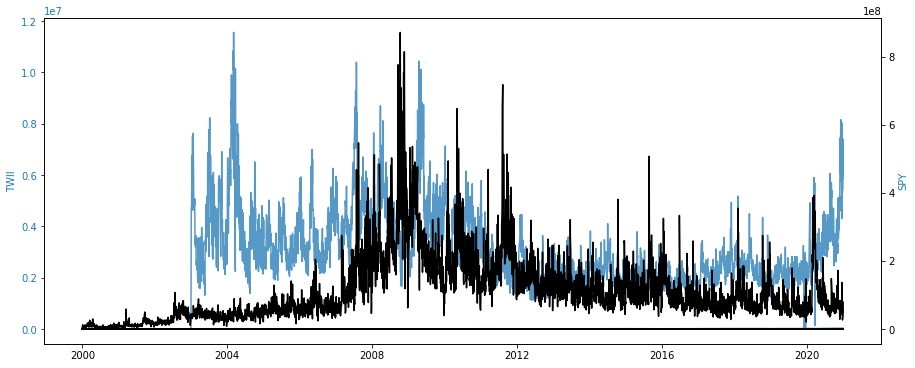

In [139]:
df1.corr()
# corr_matrix = df2.corr()
# corr_matrix["Close"].sort_values(ascending=False)
# plt.scatter(df, df1)
# plt.title('corr_gust :' + str(df), fontproperties='SimHei') #給圖寫上title
# plt.show()
fig,ax1 = plt.subplots(nrows=1,ncols=1,figsize=(15,6))
ax1.set_ylabel('TWII', color='tab:blue')
ax1.plot(df, color='tab:blue', alpha=0.75)
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2 = ax1.twinx()
ax2.set_ylabel('SPY', color='tab:blue')
ax2.plot(df1, color='black', alpha=1)
ax2.tick_params(axis='y', labelcolor='black')
plt.show()


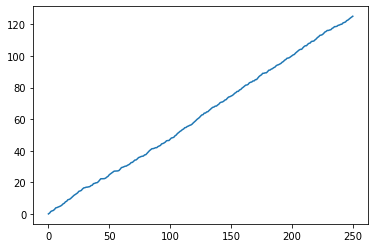

In [17]:
import numpy as np

d = np.random.random(250)*1/(250**5)
x=np.append(np.array([0]),np.cumsum(d))
plt.plot(x)